# Project Objective

## Background
This dataset contains personal online shopping orders placed by myself and my wife between 2018 and 2025. It includes information such as purchase date, product details, quantity, platform, discount applied, payment method, delivery status, and returns. The data was manually collected over the years for personal tracking and financial awareness.

## Goal
To analyze our online shopping behavior over time, uncover key spending trends, identify which platforms and products we favor, and highlight areas where we've saved or lost money (e.g., discounts, returns).

## Who is this for?
This project is for potential employers or recruiters evaluating my data analysis skills. It's also for myself, as a way to apply data storytelling concepts and learn how to communicate insights effectively.

## Expected Deliverables
- Cleaned dataset and feature engineering
- Key insights with visualizations (using Python and best practices from *Storytelling with Data*)
- Slide deck with 3–5 insights presented clearly
- GitHub repository with project documentation


In [1]:
# Import libraries
import pandas as pd

In [2]:
#loading the data
df = pd.read_csv('online_orders.csv', dtype=str, sep=';')

### I read the Dataset as string because:

While loading the dataset, I encountered issues with incorrect date parsing — specifically with the `purchase_date` column. Although the original format was `DD/MM/YY`, pandas was misinterpreting some values using the default US-style format (`MM/DD/YY`), which led to incorrect dates (e.g., `16/11/24` being read as `2024-11-04`).

To avoid this issue and ensure full control over the parsing process, I decided to read the entire dataset as strings (`dtype=str`). This approach prevents pandas from making automatic inferences and allows me to explicitly handle:
- Date parsing (with `dayfirst=True`)
- Numeric conversion
- Whitespace and formatting inconsistencies

This extra step ensures the data is cleaned consistently and reflects the actual values in the source file.


In [3]:
df.head()

,Order ID,Purchase Date,platform,items name,Category,Quantity,Unit-price,shipping cost,Discount apllied,discount amount,total price,Payment method,status,delivery date,shipping address,City,Country,return/refund,order by
0,p7yo25136g66,29/3/25,food panda,beef fried rice,food,1,115,31,no,0,146,credit card,delivered,29/3/25,"56, Chenggong E Rd, Changhua County, 510",Yuanlin,Taiwan,0,me
1,po6u2501tjvc,5/1/25,food panda,braised beef noodle soup combo,food,1,245,23,no,0,268,credit card,delivered,5/1/25,"56, Chenggong E Rd, Changhua County, 510",Yuanlin,Taiwan,0,me
2,uad22451s19m,21/12/24,food panda,Local Taiwanese roasted pork sandwich set,food,1,185,0,yes,5,185,credit card,delivered,21/12/24,"56, Chenggong E Rd, Changhua County, 510",Yuanlin,Taiwan,0,me
3,uad22451s19m,21/12/24,food panda,cheese bombed roast pork sandwich set,food,1,259,0,yes,5,254,credit card,delivered,21/12/24,"56, Chenggong E Rd, Changhua County, 510",Yuanlin,Taiwan,0,me
4,r2cs2450hsvb,14/12/24,food panda,chicken fried rice,food,1,115,0,no,0,117,credit card,delivered,14/12/24,"56, Chenggong E Rd, Changhua County, 510",Yuanlin,Taiwan,0,me


In [4]:
df.tail()

,Order ID,Purchase Date,platform,items name,Category,Quantity,Unit-price,shipping cost,Discount apllied,discount amount,total price,Payment method,status,delivery date,shipping address,City,Country,return/refund,order by
1514,112-2090574-5747442,8/4/25,Amazon,Shape & Color Sorting Montessori Toys for Todd...,baby supplies,1,433,209,yes,161,481,credit card,delivered,16/4/25,"56, Chenggong E Rd, Changhua County, 510",Yuanlin,Taiwan,0,me
1515,112-2090574-5747442,8/4/25,Amazon,Yetonamr Montessori Toys for 1 2 3 Years Old B...,baby supplies,1,270,209,yes,161,318,credit card,delivered,16/4/25,"56, Chenggong E Rd, Changhua County, 510",Yuanlin,Taiwan,0,me
1516,112-2090574-5747442,8/4/25,Amazon,"Zeoddler Alphabet Puzzles, Wooden Puzzles for ...",baby supplies,1,180,209,yes,161,228,credit card,delivered,16/4/25,"56, Chenggong E Rd, Changhua County, 510",Yuanlin,Taiwan,0,me
1517,"2,46092E+14",29/4/20,Lazada,Danux Wireless Bluetooth Remote Game Joystick ...,Entertainment,1,47,11,no,0,58,cash on delivery,returned,8/5/20,"Trường Đại học Ngoại ngữ, Dịch Vọng Hậu, Cầu Giấy",Ha Noi,Vietnam,47,me
1518,240526C4DQ1XGQ,26/5/24,Shopee,Hongjiayuan latest 5G dual-band five-antenna m...,Electronic,1,699,45,yes,45,699,credit card,returned,28/5/24,"56, Chenggong E Rd, Changhua County, 510",Yuanlin,Taiwan,699,me


In [5]:
df.shape


(1519, 19)

In [6]:
df.columns

Index(['Order ID', 'Purchase Date', 'platform', 'items name', ' Category',
       'Quantity', 'Unit-price', 'shipping cost', 'Discount apllied',
       'discount amount', ' total price', 'Payment method', 'status',
       'delivery date', 'shipping address', 'City', 'Country', 'return/refund',
       'order by'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          1519 non-null   object
 1   Purchase Date     1519 non-null   object
 2   platform          1519 non-null   object
 3   items name        1519 non-null   object
 4    Category         1519 non-null   object
 5   Quantity          1519 non-null   object
 6   Unit-price        1519 non-null   object
 7   shipping cost     1519 non-null   object
 8   Discount apllied  1519 non-null   object
 9   discount amount   1519 non-null   object
 10   total price      1519 non-null   object
 11  Payment method    1519 non-null   object
 12  status            1519 non-null   object
 13  delivery date     1519 non-null   object
 14  shipping address  1519 non-null   object
 15  City              1519 non-null   object
 16  Country           1519 non-null   object
 17  return/refund 

In [8]:
df.isnull().sum()

Order ID            0
Purchase Date       0
platform            0
items name          0
 Category           0
Quantity            0
Unit-price          0
shipping cost       0
Discount apllied    0
discount amount     0
 total price        0
Payment method      0
status              0
delivery date       0
shipping address    0
City                0
Country             0
return/refund       0
order by            0
dtype: int64

In [9]:
df.describe()

,Order ID,Purchase Date,platform,items name,Category,Quantity,Unit-price,shipping cost,Discount apllied,discount amount,total price,Payment method,status,delivery date,shipping address,City,Country,return/refund,order by
count,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519
unique,778,490,11,1329,29,10,391,77,3,96,434,5,2,552,16,7,2,4,2
top,283a4,3/1/25,Food panda,Chicken skin,food,1,35,0,yes,0,35,credit card,delivered,15/8/23,"56, Chenggong E Rd, Changhua County, 510",Yuanlin,Taiwan,0,wife
freq,19,23,555,9,574,1359,52,249,846,675,29,1206,1517,19,684,1010,1142,1516,892


In [10]:
df.duplicated().sum() 

np.int64(0)

In [11]:
df.nunique()    

Order ID             778
Purchase Date        490
platform              11
items name          1329
 Category             29
Quantity              10
Unit-price           391
shipping cost         77
Discount apllied       3
discount amount       96
 total price         434
Payment method         5
status                 2
delivery date        552
shipping address      16
City                   7
Country                2
return/refund          4
order by               2
dtype: int64

#### After checking the unique values I have noticed few issue with column platform and category which has way more values than normal. (thing we need to clean later)

## Data Cleaning

In [12]:
# clean the column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

In [13]:
# convert data types
df['purchase_date'] = pd.to_datetime(df['purchase_date'].str.strip(), format="%d/%m/%y", errors="coerce")
df['delivery_date'] = pd.to_datetime(df['delivery_date'].str.strip(), format="%d/%m/%y", errors="coerce")
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
df['shipping_cost'] = pd.to_numeric(df['shipping_cost'], errors='coerce')
df['discount_amount'] = pd.to_numeric(df['discount_amount'], errors='coerce')
df['total_price'] = pd.to_numeric(df['total_price'], errors='coerce')


In [14]:
# feature engineering
df['delivery_days'] = (df['delivery_date'] - df['purchase_date']).dt.days
df['discount_used']  = df['discount_amount'] > 0
df['order_month'] = df['purchase_date'].dt.month
df['order_year'] = df['purchase_date'].dt.year
df['order_month_year'] = df['purchase_date'].dt.to_period('M').astype(str)
df['is_returned'] = df['return/refund'].astype(float).apply(lambda x: 1 if x > 0 else 0)


##### after adding delivery_days column I have noticed that some delivery dates were found to be earlier than their corresponding purchase dates due to manual entry errors. Since this dataset was self-collected, the original file was reviewed and corrected to reflect accurate delivery timelines.

In [15]:
df

,order_id,purchase_date,platform,items_name,category,quantity,unit_price,shipping_cost,discount_apllied,discount_amount,...,city,country,return/refund,order_by,delivery_days,discount_used,order_month,order_year,order_month_year,is_returned
0,p7yo25136g66,2025-03-29,food panda,beef fried rice,food,1,115,31,no,0,...,Yuanlin,Taiwan,0,me,0,False,3,2025,2025-03,0
1,po6u2501tjvc,2025-01-05,food panda,braised beef noodle soup combo,food,1,245,23,no,0,...,Yuanlin,Taiwan,0,me,0,False,1,2025,2025-01,0
2,uad22451s19m,2024-12-21,food panda,Local Taiwanese roasted pork sandwich set,food,1,185,0,yes,5,...,Yuanlin,Taiwan,0,me,0,True,12,2024,2024-12,0
3,uad22451s19m,2024-12-21,food panda,cheese bombed roast pork sandwich set,food,1,259,0,yes,5,...,Yuanlin,Taiwan,0,me,0,True,12,2024,2024-12,0
4,r2cs2450hsvb,2024-12-14,food panda,chicken fried rice,food,1,115,0,no,0,...,Yuanlin,Taiwan,0,me,0,False,12,2024,2024-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,112-2090574-5747442,2025-04-08,Amazon,Shape & Color Sorting Montessori Toys for Todd...,baby supplies,1,433,209,yes,161,...,Yuanlin,Taiwan,0,me,8,True,4,2025,2025-04,0
1515,112-2090574-5747442,2025-04-08,Amazon,Yetonamr Montessori Toys for 1 2 3 Years Old B...,baby supplies,1,270,209,yes,161,...,Yuanlin,Taiwan,0,me,8,True,4,2025,2025-04,0
1516,112-2090574-5747442,2025-04-08,Amazon,"Zeoddler Alphabet Puzzles, Wooden Puzzles for ...",baby supplies,1,180,209,yes,161,...,Yuanlin,Taiwan,0,me,8,True,4,2025,2025-04,0
1517,"2,46092E+14",2020-04-29,Lazada,Danux Wireless Bluetooth Remote Game Joystick ...,Entertainment,1,47,11,no,0,...,Ha Noi,Vietnam,47,me,9,False,4,2020,2020-04,1


In [16]:
# find unique values in a column
df["category"].unique()

array(['food', 'Packaging Supplies', 'Household Items', 'baby supplies',
       'Beauty & Personal Care', 'Fashion & Apparel', 'Electronic',
       'Groceries', 'Entertainment', 'vehicule accessory',
       'packaging Supplies', 'Beverage', 'beverage', 'groceries', 'Food',
       'Pet Supply', 'household Items', 'pet Supply', 'Workout Equipment',
       'others', 'Others', 'Supplement', 'fashion & Apparel',
       'beauty & Personal Care', 'workout Equipment', 'electronic',
       'Book', 'supplement', 'book'], dtype=object)

In [17]:
# standardize the categorical fileds
df["platform"] = df["platform"].str.strip().str.lower()
df["category"] = df["category"].str.strip().str.lower()
df["payment_method"] = df["payment_method"].str.strip().str.lower()

In [18]:
# Removing columns
df.drop(columns=["discount_apllied", "status"], inplace=True)

#### I have removed these discount_applied because i have create a new column discount_used which is a boolean and status is the same value for the all dataset all our items have been delivered

In [19]:
df.to_csv('cleaned_data.csv', index=False)

## Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Year-over-Year Spending Growth
To understand how your annual online spending has evolved, we:

In [21]:
yr_ovr_yr = (
    df.groupby('order_year')['total_price'].sum()
    .pct_change()
    .reset_index()
    .rename(columns={'total_price': 'YoY_growth'})
)

print(yr_ovr_yr)


   order_year  YoY_growth
0        2018         NaN
1        2019    0.581234
2        2020    7.544216
3        2021   -0.315930
4        2022    0.215730
5        2023    0.145410
6        2024    3.804000
7        2025   -0.665415


**Key insights:**

- **2019 (+58.12%)**:saw an increase due to my first full year in Vietnam as a student. I relied heavily on online orders to navigate a new city where I wasn't yet familiar with local stores.  
- **2020 (+754.42%)**: spiked dramatically due to the  pandemic lockdowns I was forced to purchase nearly everything online.  
- **2021 (–31.59%)**: experienced a pullback a job loss early in the year tightened my budget.
- **2022 (+21.57%)**: an increase after moving to a new city, and unfamiliar with local shopping options and start heavy online ordering.  
- **2023 (+14.54%)**: experienced a pullback, we spent less on extras so we could save up before the baby arrived.  
- **2024 (+380.40%)**: Dramatically increase due to relocation to Taiwan in March—where we didn’t yet speak the language, and expanding to a three-member family, we leaned on online shopping for convenience and baby supplies.  
- **2025 (–66.54%)**: We’re only partway through the year, so it looks like spending fell, but that’s just because the data isn’t complete yet, not because we really spent less.

### 2. Overall Discount Savings Rate

This metric quantifies how much of your total purchase value was saved through discounts. We:

In [22]:
total_spent = df['total_price'].sum()
total_discount = df['discount_amount'].sum()
savings_rate = total_discount / (total_spent + total_discount)

print(f"Discount Savings Rate: {savings_rate:.2%}")


Discount Savings Rate: 6.65%


In other words, for every \$100 of full-price items, you saved about \$6.65 thanks to discounts.	This highlights the overall impact of promotional offers on your spending.

### 3. Return Rate

This metric shows the proportion of orders you end up sending back. We:

In [23]:
return_rate = df['is_returned'].mean()
print(f"Return Rate: {return_rate:.2%}")

Return Rate: 0.20%


At just two tenths of one percent, we return fewer than 1 out of every 500 orders, confirming that we from 2018 to 2025 we return only 4 times 

### 4. Same-Day Delivery Rate
This metric measures how often our orders arrive on the same day:

In [24]:
same_day = (df['delivery_days'] == 0).mean()
print(f"Same-Day Delivery Rate: {same_day:.2%}")


Same-Day Delivery Rate: 59.18%


Nearly 6 out of 10 of our orders arrive the same day. This high rate is largely driven by your frequent food orders, which typically offer same-day delivery.

### 5. Spending Share by Household Member
To see who has spent more money shopping online

In [25]:
total_by_person = df.groupby('order_by')['total_price'].sum()
print(total_by_person)

percentage = total_by_person / total_by_person.sum()
print(f"Spending Share:\n{percentage}")


order_by
me      146441
wife    214973
Name: total_price, dtype: int64
Spending Share:
order_by
me      0.405189
wife    0.594811
Name: total_price, dtype: float64



| Person | Total Spent | Share of Spending |
|:------:|------------:|------------------:|
| Me     | \$146,441   | 40.52%            |
| Wife   | \$214,973   | 59.48%            |

**Insight:** My wife accounts for nearly 60% of the total online spending, while I account for about 40%. This split could reflect differences in purchase categories or frequency.

### 6.  Top 10 Items by Total Spend
To highlight your biggest investments

In [26]:
# Top spending Items
df.groupby('items_name')['total_price'].sum().sort_values(ascending=False).head(10)

items_name
Sony Playstation 5 Pro + Playstation VR2                                                                                                                                                       36960
ACER Swift 3 SF314-58G-52AL 14-inch Thin Laptop Pink                                                                                                                                           21900
Honeywell Free Filter USA-Anti-allergy Series Air Purifier (Black) HPA-202APTW                                                                                                                  6990
Estee Lauder aTerun super conducting all-round reparairing lotion 50ml+30ml(combo)                                                                                                              6311
[BRUNO] Smokeless multifunctional electric grill pan                                                                                                                                            5631
Shar

**Key observations:**
- **Gaming & Entertainment:** The PS5 Pro + VR2 bundle tops the list, indicating a major one-time gaming purchase.  
- **Computing & Productivity:** High-value laptops and peripherals (Acer Swift 3, Logitech mouse) suggest significant investment in work or study tools.  
- **Home & Wellness:** Items like air purifiers, steam mops, and electric grills show our focus on home comfort and convenience.  


### 7. How has our monthly and yearly online spending changed from 2018 to 2025?
- The goal is to understand change in our monthly and yearly spending behavior across the 2018-2025 period.

#### What we need to do:
- Group data by order_month_year or order_year and sum total_price

- Plot a line chart showing how spending changes over time

- Annotate spikes or drops (e.g., due to big purchases, refunds, or seasonal behavior)

### 7. Quarterly Online Spending Trend (2018–2025)
This line chart shows how our household’s online spending has fluctuated each quarter over eight years.

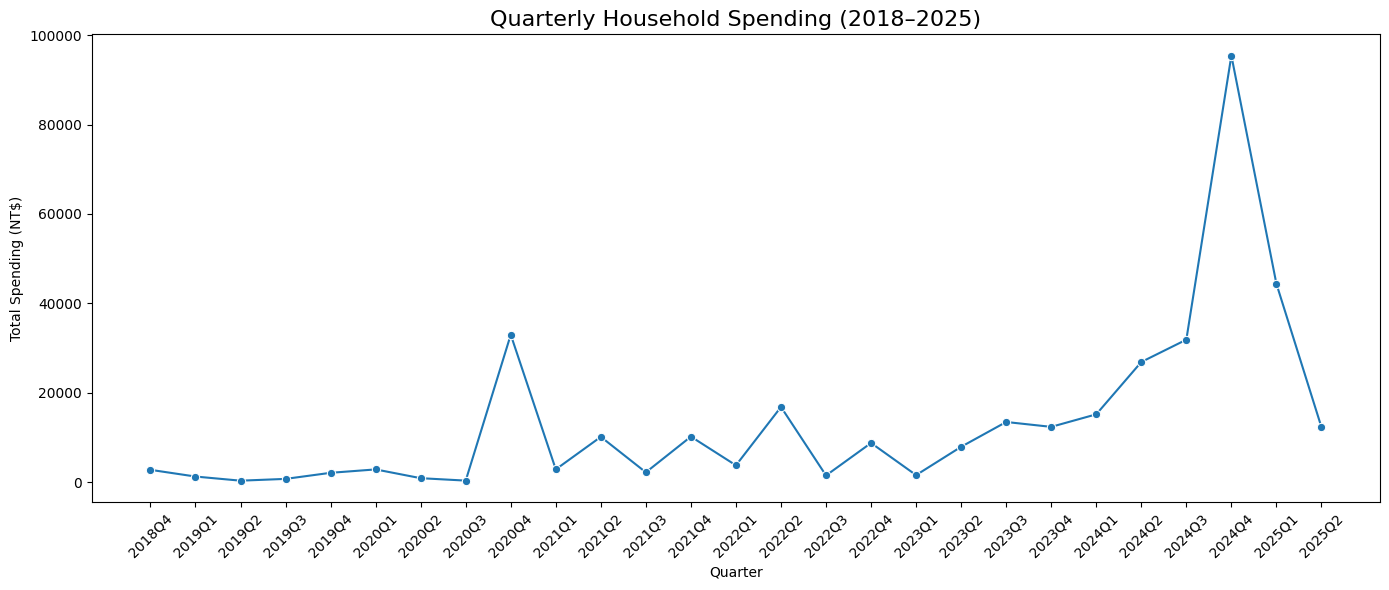

In [27]:
df['order_month_year'] = pd.to_datetime(df['order_month_year'], format="%Y-%m")
quarterly_spending = df.groupby(df['order_month_year'].dt.to_period('Q'))['total_price'].sum().reset_index()
quarterly_spending['order_month_year'] = quarterly_spending['order_month_year'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=quarterly_spending, x='order_month_year', y='total_price', marker='o')
plt.title('Quarterly Household Spending (2018–2025)', fontsize=16)
plt.xlabel('Quarter')
plt.ylabel('Total Spending (NT$)')
plt.xticks(rotation=45)
#plt.grid(True)
plt.tight_layout()
plt.show()


 A few key takeaways:
 **Major spikes**  
  - **Q2 2020** saw a dramatic jump, driven by pandemic lockdowns when almost everything had to be ordered online.  
  - **Q4 2024** reached a record high as we relocated to Taiwan and expanded our family to three—necessitating baby supplies and home setup.  
- **Recovery & growth**  
  - After the 2021 dip, spending steadily climbed through 2022 and 2023, reflecting our increasing comfort with online shopping in new cities.  
- **Seasonal pattern**  
  - Noticeably higher spending in the latter half of each year, likely tied to end-of-year events and preparations.

### 8. Which item categories  do we use the most?

- This question will help break down spending by category 

#### What we need to do is:
- Groupo by category and sum total_price
- sort descending to find the top-spending categories
- visualize with a horizontal bar chart



/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_63102/3167427576.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_spending, x='total_price', y='category', palette='Blues_d')


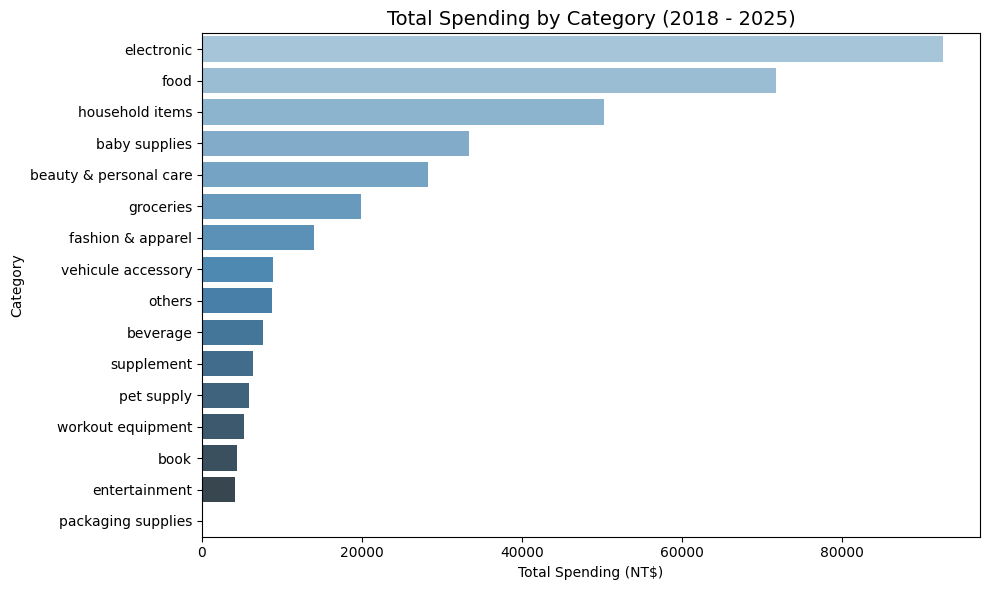

In [28]:
# Total Spending by Category
category_spending = df.groupby('category')['total_price'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=category_spending, x='total_price', y='category', palette='Blues_d')
plt.title('Total Spending by Category (2018 - 2025)', fontsize=14)
plt.xlabel('Total Spending (NT$)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

**Key takeaways:**  
- **Electronics** is our biggest spend (e.g., PS5 Pro, new laptop).  
- **Food** comes in second, since you often order meals for same-day delivery.  
- After our daughter was born, **baby supplies** moved into the top five, showing how our needs changed.  


### 9. Spending by Category & Platform

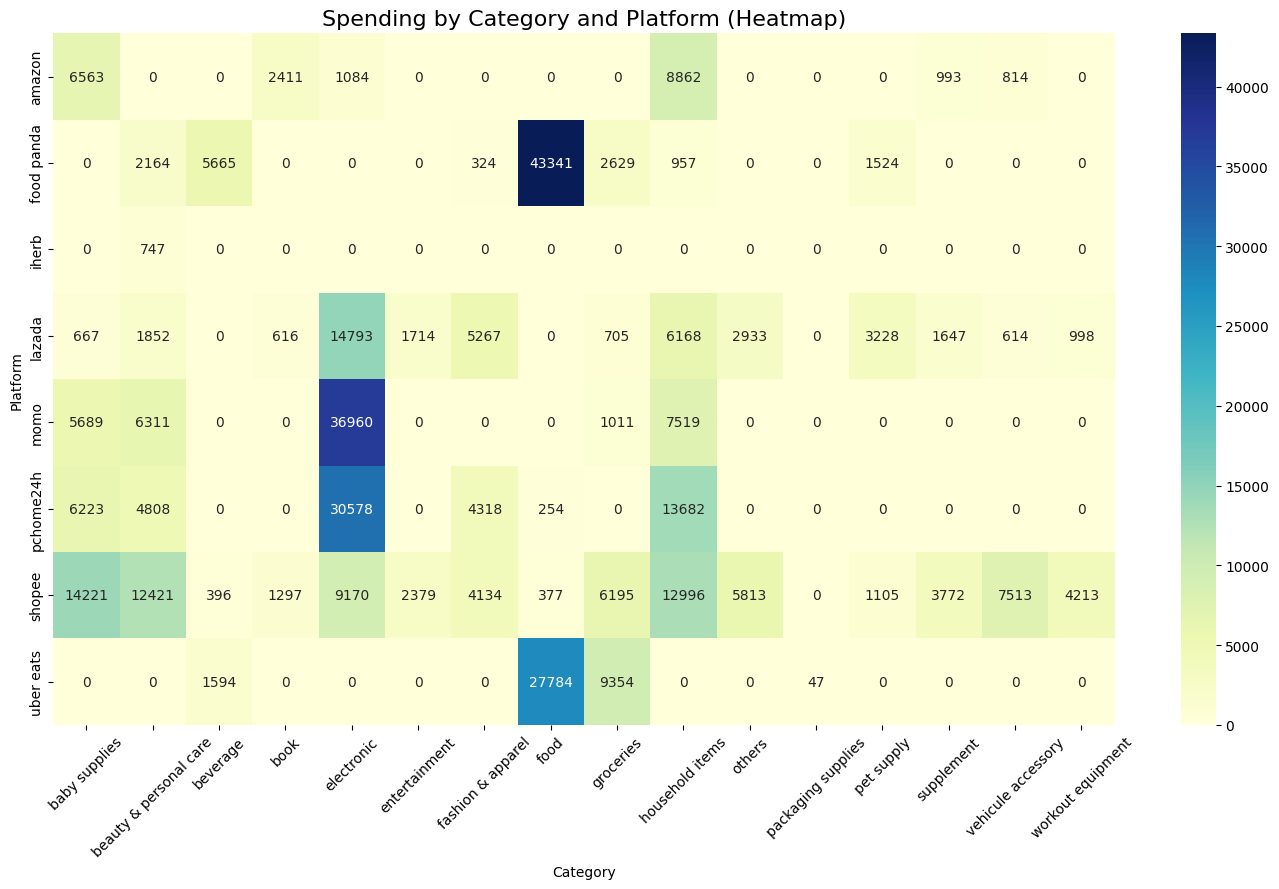

In [29]:
agg_data = df.groupby(['platform', 'category'])['total_price'].sum().reset_index()

pivot_table = agg_data.pivot(index='platform', columns='category', values='total_price').fillna(0)

plt.figure(figsize=(14, 9))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')

plt.title('Spending by Category and Platform (Heatmap)', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This heatmap visualizes our total spending broken down by **platform** (rows) and **category** (columns) from 2018 to 2025. Cells are shaded more darkly where we spent the most.

**Key insights:**
- **Food vs. Food Delivery:**  
  - **Foodpanda** (NT$43,341) and **Uber Eats** (NT$27,784) are our go-to platforms for food orders—far outpacing general retailers in the “Food” category.  
- **Electronics Hubs:**  
  - **momo** (NT$36,960) and **pchome24h** (NT$30,578) dominate electronics purchases, showing where we turn for high-value gadgets.  
- **Marketplace Mix:**  
  - **Shopee** shows a balanced profile across many categories—top in baby supplies (NT$14,221) and strong in household items (NT$12,996) and beauty (NT$12,421).  
- **Niche Platforms:**  
  - **iHerb** is almost exclusively for personal care (NT$747), while **Lazada** and **foodpanda** each have smaller pockets of activity in home goods, groceries, and apparel.



### 10. How much have we saved using discounts?
Here we need to:

Calculate total discount amount saved overall

Calculate total discount saved by year to see trends over time

Calculate discount saved by platform or category for deeper insights

Visualize these savings

In [30]:
total_discount = df['discount_amount'].sum()
print(f"Total discount saved: NT${total_discount:,.2f}")

Total discount saved: NT$25,764.00


/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_63102/170950245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_by_year, x='order_year', y='discount_amount', palette='Blues_d')


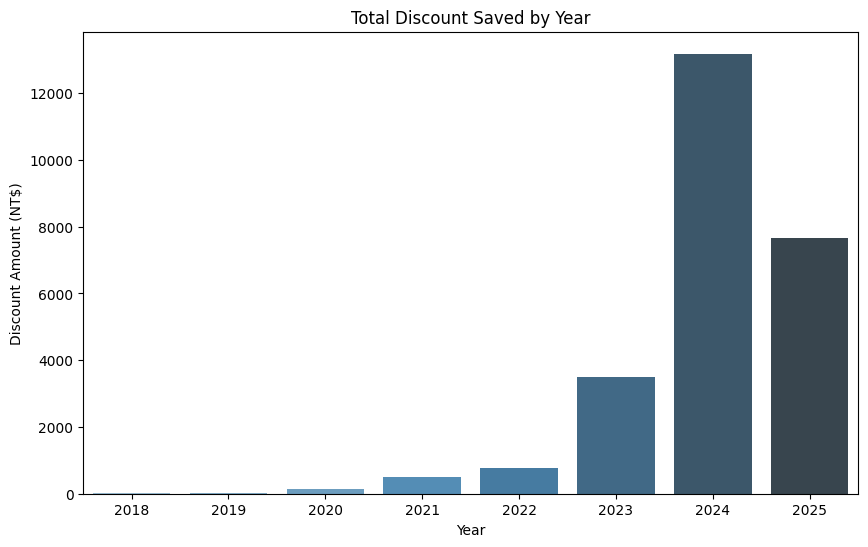

In [31]:
discount_by_year = df.groupby('order_year')['discount_amount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=discount_by_year, x='order_year', y='discount_amount', palette='Blues_d')
plt.title('Total Discount Saved by Year')
plt.xlabel('Year')
plt.ylabel('Discount Amount (NT$)')
plt.show()


Over the full period, we saved a total of **NT$25,764** through discounts.

The bar chart breaks this down by year:

- **2018–2019:** Almost no savings as we were just getting started with online ordering.  
- **2020–2022:** Gradual growth in savings as we began to use more promo codes and discount events.  
- **2023:** A noticeable jump in savings, reflecting higher order volume that year.  
- **2024:** Peak savings, our biggest discount haul, coinciding with our highest spending.  
- **2025 (YTD):** Strong continued savings, showing we’re still capitalizing on deals.


### 11.Total Discounts by Platform

In [32]:
discount_by_platform = (
    df.groupby('platform')['discount_amount']
      .sum()
      .sort_values(ascending=False)
)
print(discount_by_platform)


platform
uber eats     9033
shopee        5654
food panda    4581
amazon        4505
lazada        1294
pchome24h      697
iherb            0
momo             0
Name: discount_amount, dtype: int64


/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_63102/1185591153.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_by_platform, x='platform', y='discount_amount', palette='Blues_d')


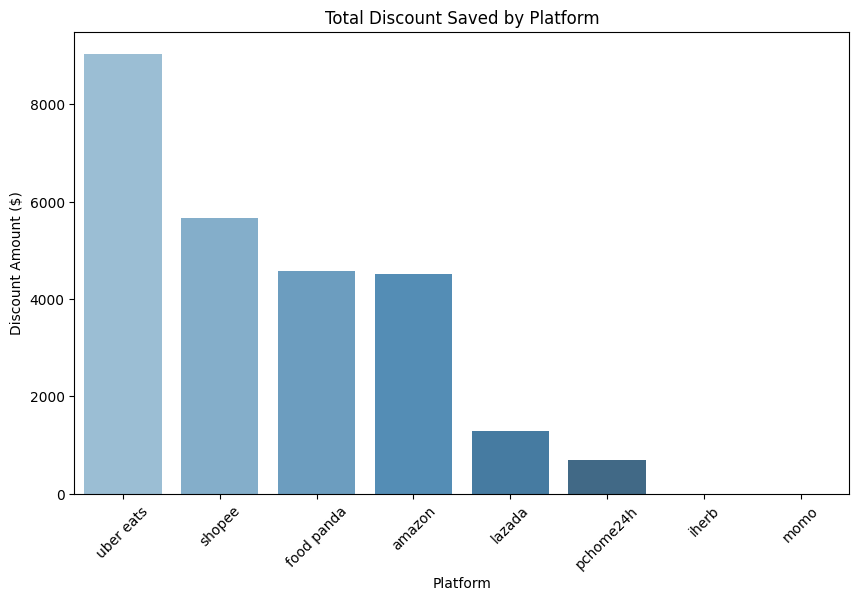

In [33]:
discount_by_platform = df.groupby('platform')['discount_amount'].sum().reset_index()
discount_by_platform = discount_by_platform.sort_values(by='discount_amount', ascending=False)
                                                        
plt.figure(figsize=(10,6))
sns.barplot(data=discount_by_platform, x='platform', y='discount_amount', palette='Blues_d')
plt.title('Total Discount Saved by Platform')
plt.xlabel('Platform')
plt.ylabel('Discount Amount ($)')
plt.xticks(rotation=45)
plt.show()


This bar chart shows how much we’ve saved on each platform through promo codes and deals:
- **Uber Eats** – ~NT$9,000 saved: our biggest discounts, driven by frequent food orders.  
- **Shopee** – ~NT$5,600 saved: strong marketplace promotions on a range of items.  
- **Amazon** & **Food Panda** – ~NT$4,500 each: consistent savings on general retail and meal delivery.  
- **Lazada**, **PChome24h**, **iHerb**, **momo** – much smaller or zero savings, suggesting fewer deals and less use.

> **Insight:** Food delivery and large e-commerce sites are where we get the best deals.









### 12. Average Delivery Time by Year

/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_63102/2958535317.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delivery_by_year, x='order_year', y='delivery_days', palette='Blues_d')


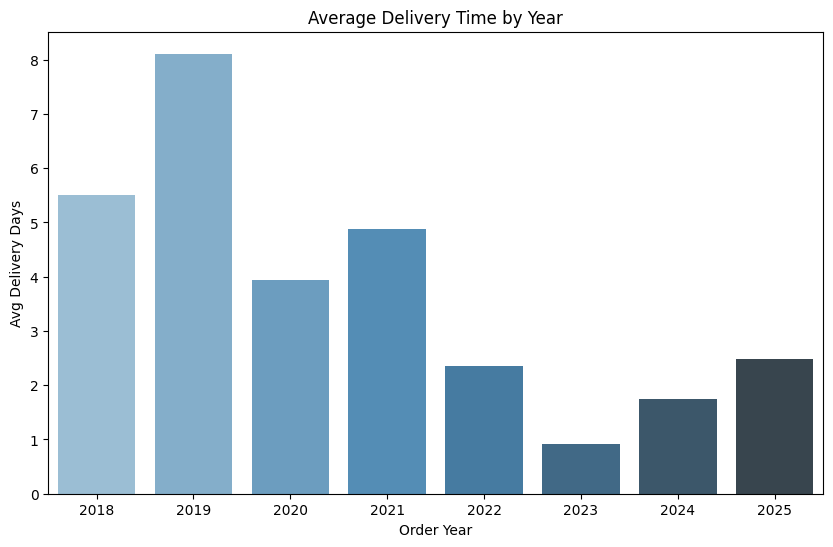

In [34]:
delivery_by_year = df.groupby('order_year')['delivery_days'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=delivery_by_year, x='order_year', y='delivery_days', palette='Blues_d')
plt.title('Average Delivery Time by Year')
plt.ylabel('Avg Delivery Days')
plt.xlabel('Order Year')
plt.show()


**Key insights:**
- **2019 (8.1 days):** In my first year in Vietnam, I didn’t know the addresses or apps well, so deliveries took longer.  
- **2020 (4.0 days):** During the pandemic, companies sped up deliveries.  
- **2021 (4.9 days):** Supply shortages slowed things down again.  
- **2022–2023 (2.3 → 0.9 days):** we used more same-day food apps, so the average dropped to under one day by 2023.  
- **2024 (1.7 days):** Ordering baby items and electronics added a bit more delay.  

### 13. Shipping Cost Over Time

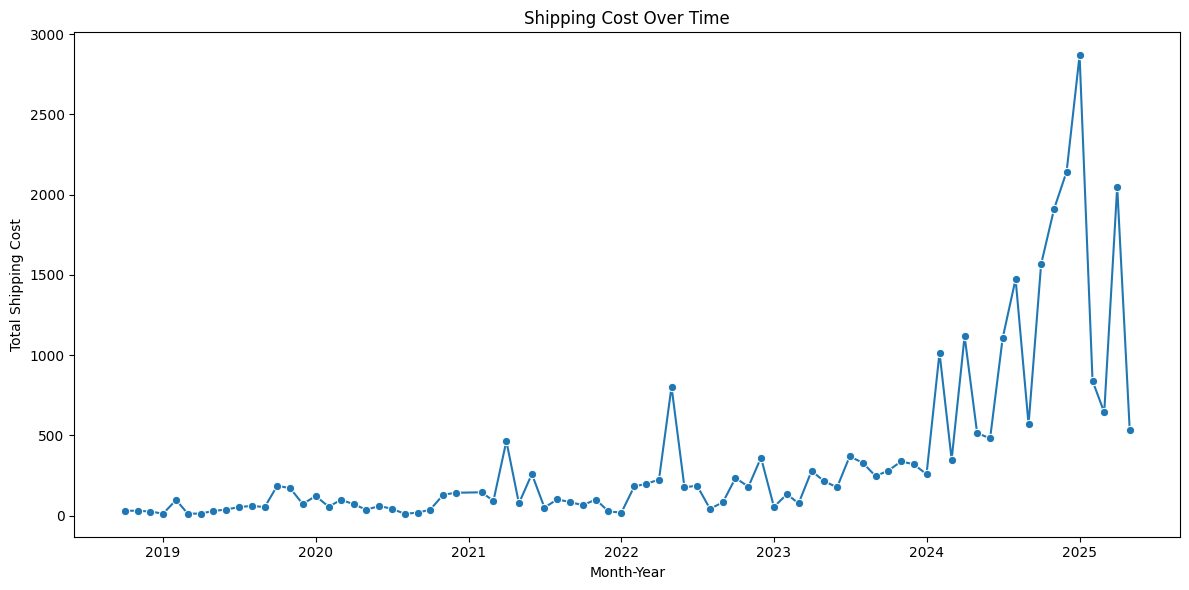

In [35]:
#Shipping cost over time
shipping_trend = df.groupby('order_month_year')['shipping_cost'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=shipping_trend, x='order_month_year', y='shipping_cost', marker='o')
plt.title('Shipping Cost Over Time')
plt.ylabel('Total Shipping Cost')
plt.xlabel('Month-Year')
plt.tight_layout()
plt.show()


This chart tracks our total monthly shipping fees from 2018 through 2025. 

**It shows:**
- **Steady low fees** early on most months under NT$100 in shipping.  
- **Spikes** in **mid-2021** and **early 2022** when we moved cities and ordered bulky items.  
- A **major jump** in **late 2024/early 2025**, matching our move to Taiwan and baby-gear deliveries.

This view highlights how shipping costs stayed low for everyday orders but jumped when we needed large or international shipments helping us see where most of our delivery fees went.  

### 14 Who is ordering more — me or my wife?

  order_by  order_id
0       me       522
1     wife       256
order_by
me      146441
wife    214973
Name: total_price, dtype: int64
Average order value per person (NT$):
- Me: NT$280.54
- Wife: NT$839.74


/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_63102/1008143280.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_counts, x='order_by', y='order_id', palette='Blues_d')


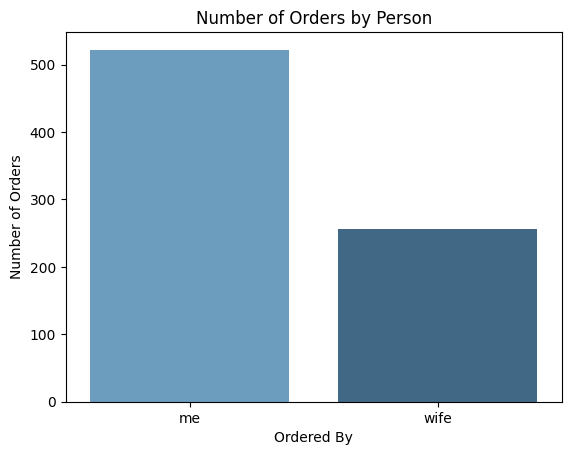

In [60]:
# Total number of orders by person
order_counts = df.groupby('order_by')['order_id'].nunique().reset_index().sort_values(by='order_id', ascending=False)
print(order_counts)
spending_by_person = df.groupby('order_by')['total_price'].sum()
print(spending_by_person)

# Print average order values
spent_by_person = df.groupby('order_by')['total_price'].sum()
avg_order_value = (spent_by_person / order_counts.set_index('order_by')['order_id']).round(2)
print("Average order value per person (NT$):")
for person, value in avg_order_value.items():
    print(f"- {person.title()}: NT${value:,.2f}")

sns.barplot(data=order_counts, x='order_by', y='order_id', palette='Blues_d')
plt.title('Number of Orders by Person')
plt.ylabel('Number of Orders')
plt.xlabel('Ordered By')
plt.show()

This chart compares how many orders each of us placed:

- **Me:** 520 orders (NT$146,441 total)  
- **Wife:** 255 orders (NT$214,973 total) 

**Average Order Value:**  
- **Me:** NT\$280.54  
- **Wife:** NT\$839.74  

> **Insight:** I place about **2×** as many orders but account for only **40%** of total spend. That means my average order (NT\$280) is roughly half the value of my wife’s (NT\$840).


### 15. Top 5 Categories by Person (Order Quantity)

order_by               category  quantity
    wife                   food       590
    wife              groceries       190
      me        household items       158
      me                 others       128
    wife               beverage        86
      me                   food        77
      me beauty & personal care        76
      me      fashion & apparel        74
    wife          baby supplies        34
    wife        household items        22


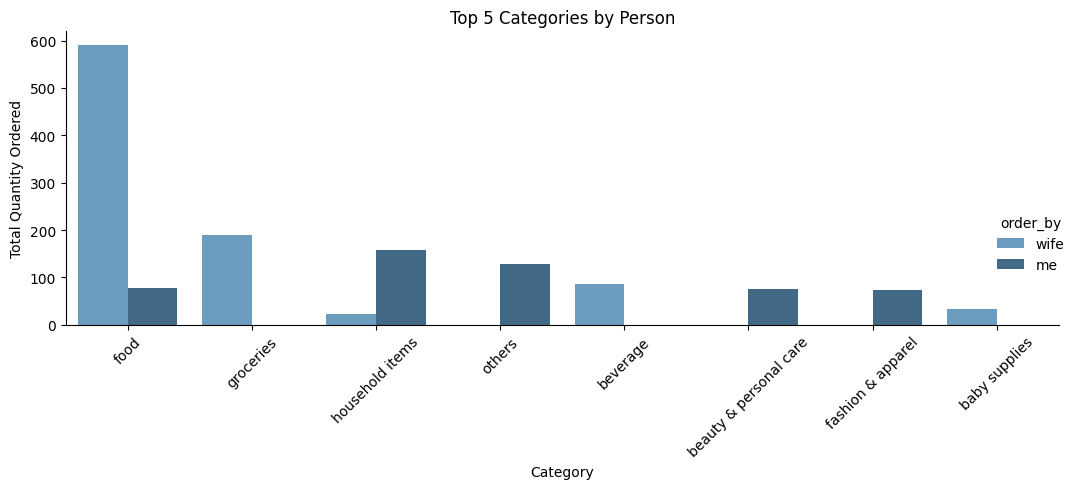

In [ ]:
top_categories = ( df.groupby(['order_by', 'category'])['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False))
top5 = top_categories.groupby('order_by').head(5)
print(top5.to_string(index=False))

top_categories = ( df.groupby(['order_by', 'category'])['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False))
top_categories = top_categories.groupby('order_by').head(5)

sns.catplot(data=top_categories, x='category', y='quantity', hue='order_by', kind='bar', height=5, aspect=2, palette='Blues_d')
plt.title('Top 5 Categories by Person')
plt.xticks(rotation=45)
plt.ylabel('Total Quantity Ordered')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


This chart shows each person’s five most-ordered categories:

- **Wife**  
  - Food: 590 orders  
  - Groceries: 190 orders  
  - Beverage: 86 orders  
  - Baby supplies: 34 orders  
  - Household items: 22 orders  

- **Me**  
  - Household items: 158 orders  
  - Others: 128 orders  
  - Food: 77 orders  
  - Beauty & personal care: 76 orders  
  - Fashion & apparel: 74 orders  

**Key takeaway:**  
- My wife’s orders are mostly consumables (meals, groceries, drinks).  
- My orders lean toward home and personal items (household goods, beauty products, apparel), showing our different priorities.  


### 16. Top 5 Spending Categories by Person

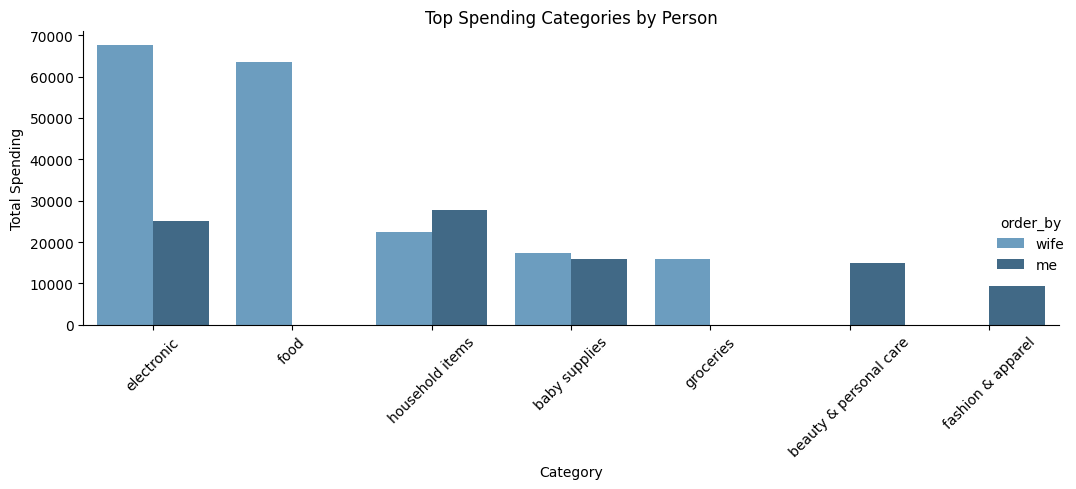

In [65]:
spending_by_category = ( df.groupby(['order_by', 'category'])['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False))

top_spending_categories = spending_by_category.groupby('order_by').head(5)

sns.catplot(data = top_spending_categories, x='category', y='total_price', hue='order_by', kind='bar', height=5, aspect=2, palette='Blues_d')
plt.title('Top Spending Categories by Person')
plt.ylabel('Total Spending')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- **Wife:**  
  Electronics, Food, Household items, Baby supplies, Groceries  

- **Me:**  
  Household items, Electronics, Beauty & personal care, Fashion & apparel, Groceries  

**Key takeaway:**  
- My wife’s biggest spends are on **electronics** and **food**, showing her focus on gadgets and meals.  
- I spend most on **household essentials** and **personal-care products**, reflecting my home and self needs.

### 17. Top Platforms by Person

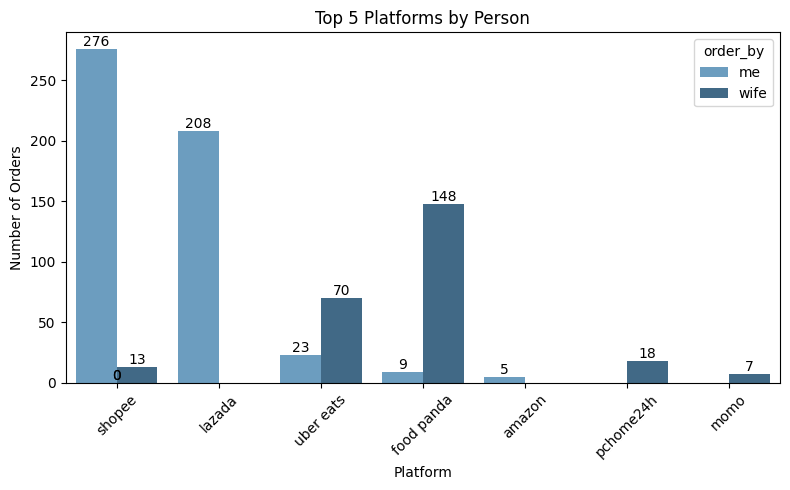

In [73]:
platform_counts = (df.groupby(['order_by', 'platform']).order_id.nunique().reset_index(name='num_orders'))

top5 = (platform_counts.sort_values(['order_by', 'num_orders'], ascending=[True, False]).groupby('order_by').head(5))

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=top5, x='platform', y='num_orders', hue='order_by', palette='Blues_d')

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),
        ha='center', va='bottom')

plt.title('Top 5 Platforms by Person')
plt.xlabel('Platform')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- **Me:**  
  - **Shopee:** 276 orders  
  - **Lazada:** 208 orders  
  - **Uber Eats:** 23 orders  
  - **Food Panda:** 9 orders  
  - **PChome24h:** 5 orders  

- **Wife:**  
  - **Uber Eats:** 148 orders  
  - **PChome24h:** 18 orders  
  - **Momo:** 7 orders  

**Key takeaway:**  
I rely mostly on general marketplaces like Shopee and Lazada, while my wife leans heavily on food-delivery and quick-ship apps (Uber Eats, PChome24h, momo).  


### Top 5 Delivery Cities

city
Yuanlin        1010
Ho Chi Minh     231
Ha Noi          146
Tainan           72
Kaohsiung        51
Name: count, dtype: int64


/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_63102/3939597071.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_d')


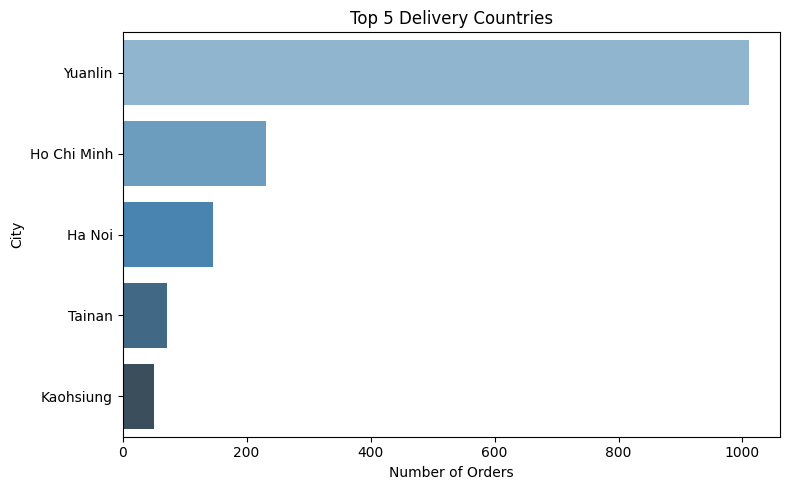

In [74]:
top_countries = df['city'].value_counts().head(5)
print(top_countries)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_d')
plt.title('Top 5 Delivery Countries')
plt.xlabel('Number of Orders')
plt.ylabel('City')
plt.tight_layout()
plt.show()


This chart shows which cities received the most of our online orders:

- **Yuanlin:** 1,010 orders  
- **Ho Chi Minh:** 231 orders  
- **Ha Noi:** 146 orders  
- **Tainan:** 72 orders  
- **Kaohsiung:** 52 orders  

**Key takeaway:**  
- **Yuanlin** tops the list, my wife is from there and has lived in Taiwan far longer than I have, so most packages go to her hometown.  
- **Ho Chi Minh** and **Ha Noi** reflect my earlier years living in Vietnam.  
- **Tainan** and **Kaohsiung** are smaller but show our occasional orders when we’ve been elsewhere in Taiwan.  

In [42]:
import pandas as pd

# Total number of orders (unique order IDs)
total_orders = df['order_id'].nunique()

# Total quantity of items purchased
total_items_purchased = df['quantity'].sum()

# Average discount used (only when discount > 0)
avg_discount_used = df.loc[df['discount_amount'] > 0, 'discount_amount'].mean()

# Average delivery time (in days)
avg_delivery_days = df['delivery_days'].mean()

# Return rate: % of orders that were refunded
return_rate = (df['is_returned'].sum() / len(df)) * 100

# Savings rate: Total discount amount vs total price before discount
# Assuming total_price already includes discount, we'll estimate pre-discount price
total_spent = df['total_price'].sum()
total_saved = df['discount_amount'].sum()
savings_rate = (total_saved / (total_spent + total_saved)) * 100

# Assemble into a summary DataFrame
summary = pd.DataFrame({
    'Metric': [
        'Total Orders',
        'Total Items Purchased',
        'Average Discount Used (when applied)',
        'Average Delivery Time (days)',
        'Return Rate (%)',
        'Savings Rate (%)'
    ],
    'Value': [
        total_orders,
        total_items_purchased,
        round(avg_discount_used, 2),
        round(avg_delivery_days, 2),
        round(return_rate, 2),
        round(savings_rate, 2)
    ]
})

summary


,Metric,Value
0,Total Orders,778.00
1,Total Items Purchased,1803.00
2,Average Discount Used (when applied),30.53
3,Average Delivery Time (days),2.20
4,Return Rate (%),0.20
5,Savings Rate (%),6.65


In [43]:
df.columns

Index(['order_id', 'purchase_date', 'platform', 'items_name', 'category',
       'quantity', 'unit_price', 'shipping_cost', 'discount_amount',
       'total_price', 'payment_method', 'delivery_date', 'shipping_address',
       'city', 'country', 'return/refund', 'order_by', 'delivery_days',
       'discount_used', 'order_month', 'order_year', 'order_month_year',
       'is_returned'],
      dtype='object')

In [75]:
dt= pd.read_csv('cleaned_data.csv', dtype=str)